In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os.path import basename, exists
import matplotlib as mpl

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')

Downloaded az-paper-twocol.mplstyle


53


Text(0, 0.5, 'Population Density')

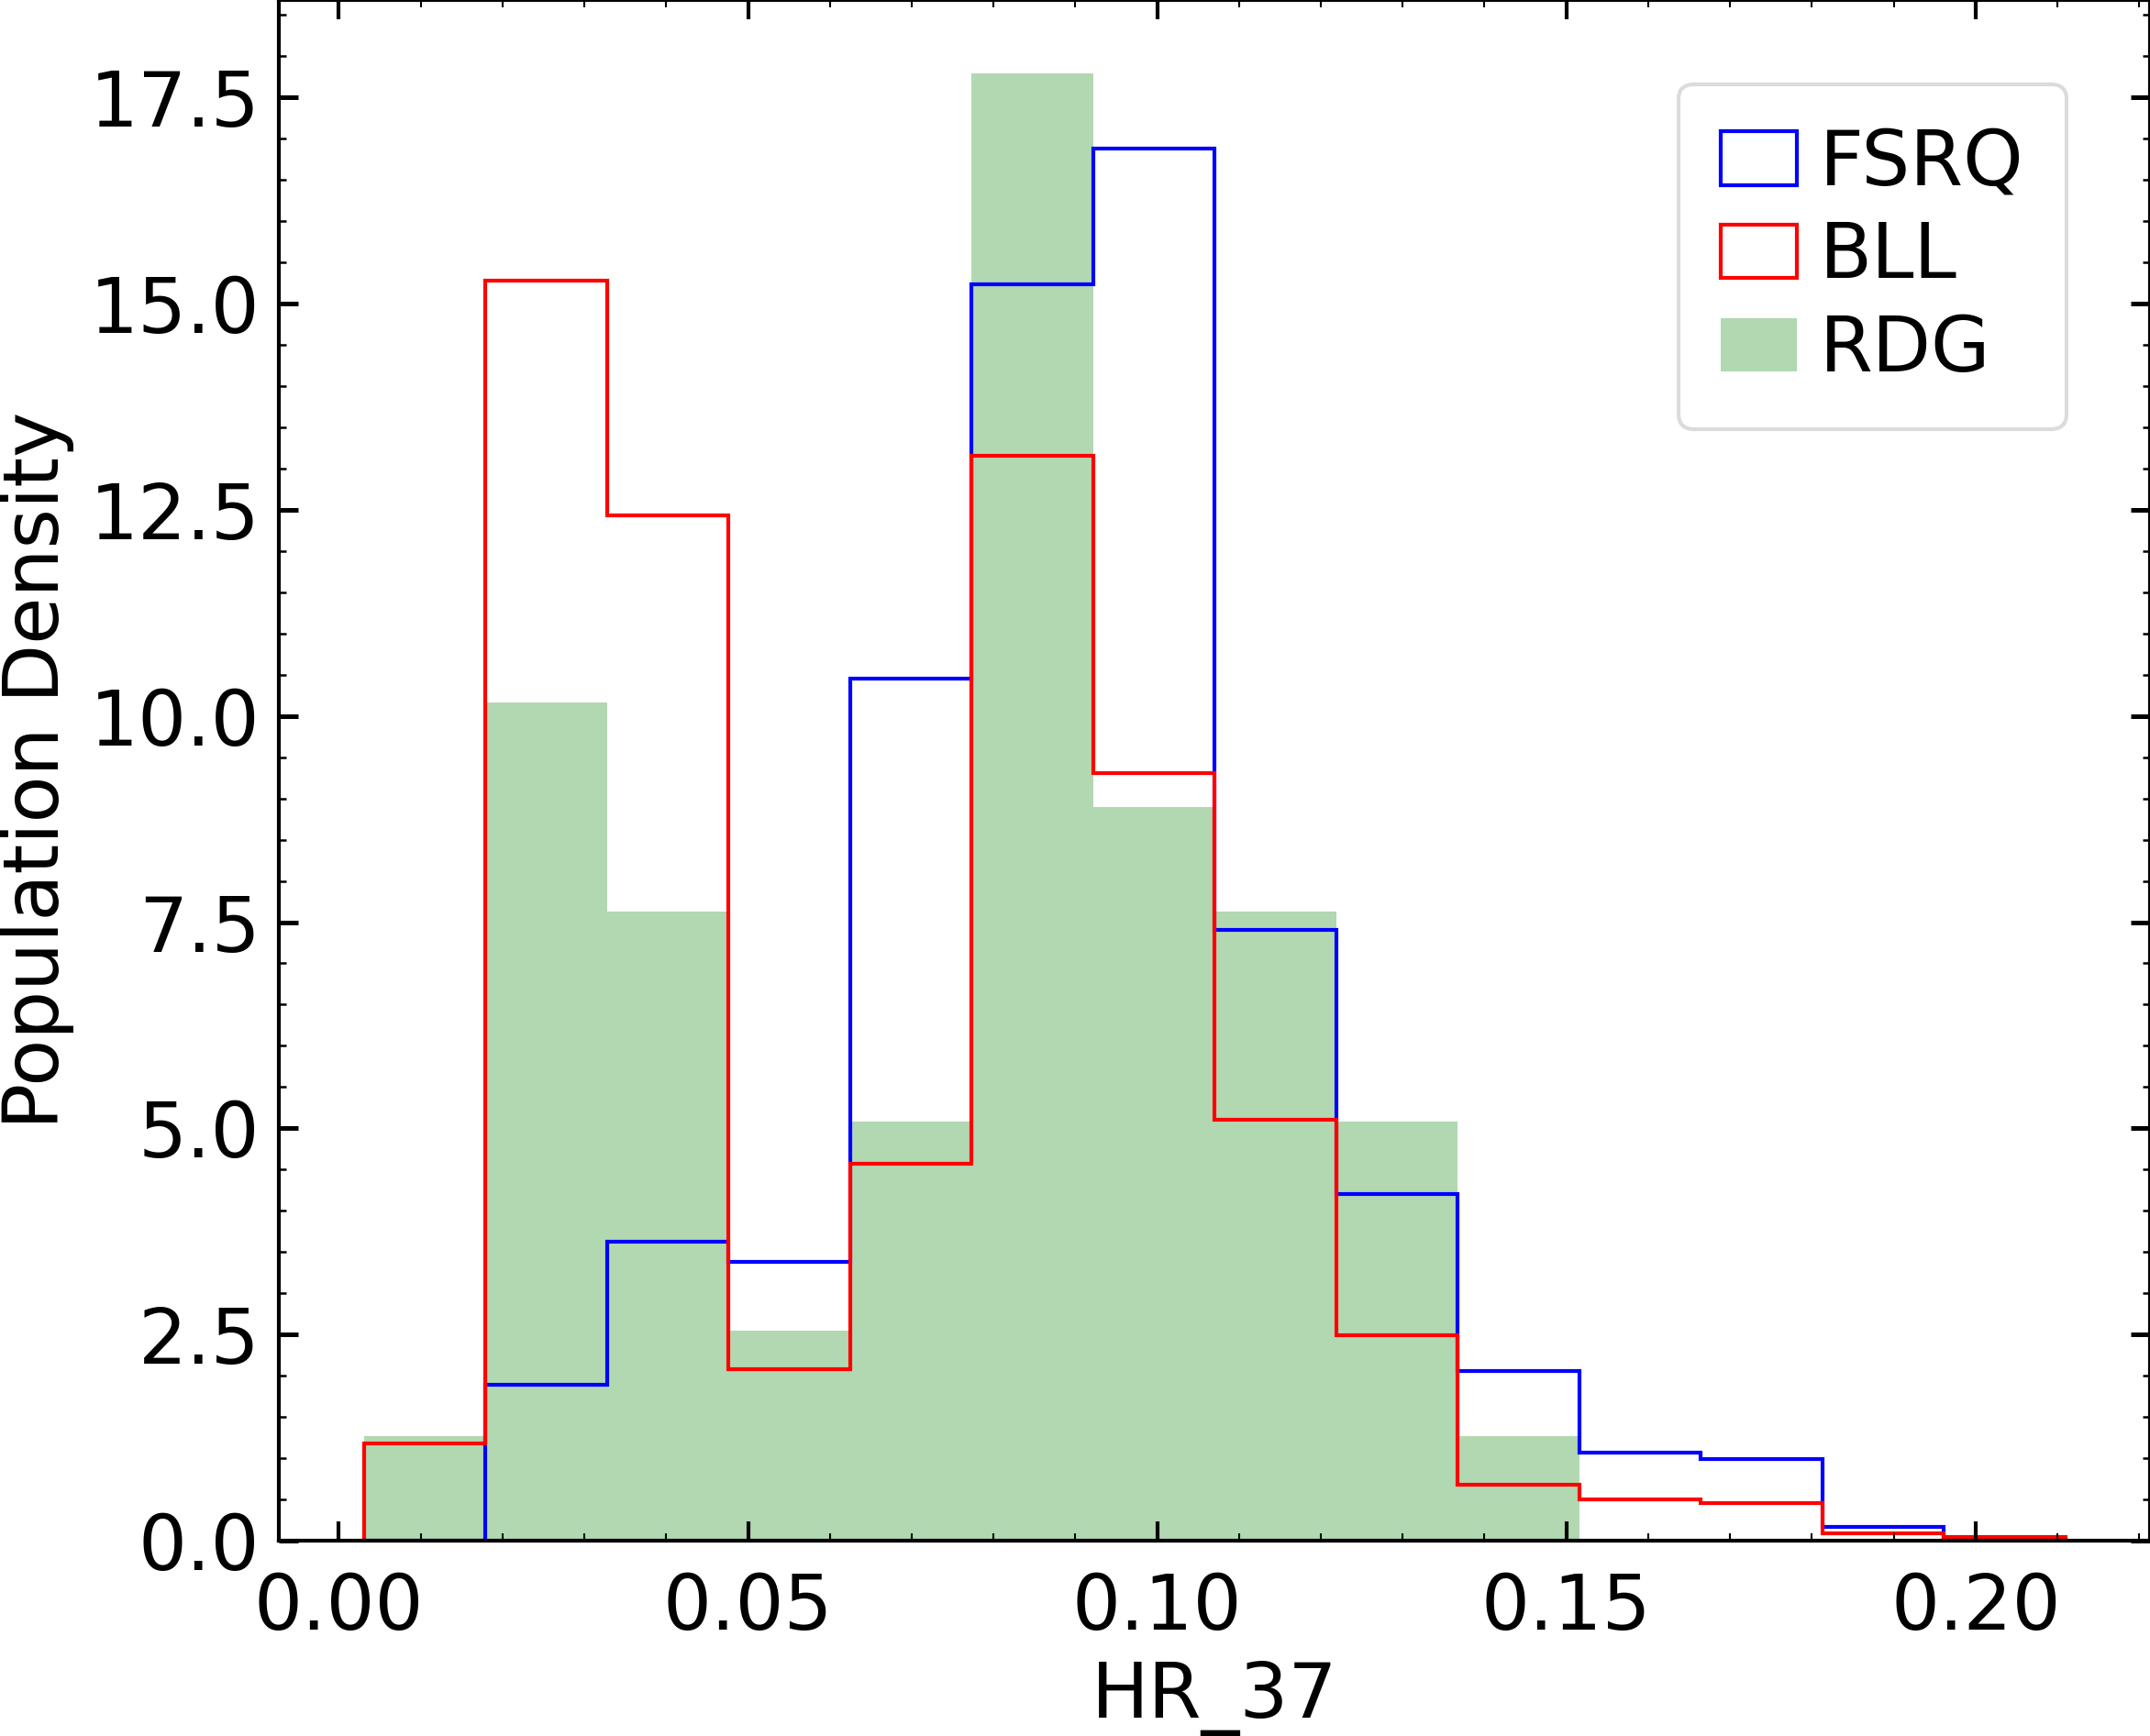

: 

In [26]:
df=pd.read_csv('..\\..\\Fermi-LAT Data\\fl_numericalonly_nopositional_withclasses.csv',index_col=0)

df=df.replace(-np.inf,-99999)
df=df.replace(np.inf,99999)

var='HR_37'

fsrq=df[var].loc[df['CLASS1']==2]
bll=df[var].loc[df['CLASS1']==1]
rdg=df[var].loc[df['CLASS1']==3]
print(len(rdg))

fig, ax = plt.subplots(figsize = (8,7),dpi=300)
#ax2 = ax.twinx()
n=20
N=15
ax.hist(fsrq,histtype='step',color='blue',density=True,label = 'FSRQ',bins=np.linspace(np.min(df[var]),np.max(df[var]),N))
ax.hist(bll,histtype='step',color='red',density=True,label='BLL',bins=np.linspace(np.min(df[var]),np.max(df[var]),N))
ax.hist(rdg,histtype='stepfilled',color='green',density=True,alpha=0.3,label='RDG',bins=np.linspace(np.min(df[var]),np.max(df[var]),N))
ax.legend(fontsize=n)
plt.xticks(fontsize=n)
plt.yticks(fontsize=n)
#ax.set_xbound(1.35,3.05)
ax.set_xlabel(var,fontsize=n)
ax.set_ylabel('Population Density',fontsize=n)